**Project 4 : Regression Analysis and Define Your Own Task!**

Kuei-Tzu Hu 206300553

Sreya Muppalla 505675909

Christina Lee 406299676

# **1. Introduction**

Regression analysis is a statistical procedure for estimating the relationship between a target variable and a set of features that jointly inform about the target. In this project, we explore specific-to-regression feature engineering methods and model selection that jointly improve the performance of regression. You will conduct different experiments and identify the relative significance of the different options.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/ECE ENGR 219/

Mounted at /content/drive
/content/drive/My Drive/ECE ENGR 219


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **2. Datasets**

**2.1 Dataset 1: Diamond Characteristics**

This dataset contains information about 150000 round-cut diamonds.

- features:  
. carat: weight of the diamond  
. cut: quality of the cut  
. clarity: measured diamond clarity  
. length: measured length in mm  
. width: measured width in mm  
. depth: measured depth in mm  
. depth percent: diamond’s total height divided by it’s total width  
. table percent: width of top of diamond relative to widest point  
. gridle min: refers to the thinnest part of the girdle  
. gridle max: refers to the thickest part of the girdle  
- target variable: i.e what we would like to predict:  
. price: price in US dollars

## 3.1.2 Data Inspection

**Question 1.1**

Which features have the highest absolute correlation with the target variable. In the context of either dataset, describe what the correlation patterns suggest.

 - carat has the highest absolute correlation.
 - Correlation patterns suggest the relevance(strength of the linear association) between the given feature and the target variable. Higher absolute correlation indicates higher relevance, which usually coresponds to feature importance. Shown below, the correlation pattern of the diamond dataset suggest the most to least relevant features(except for price, which is 1 because it's the same variable) with price.


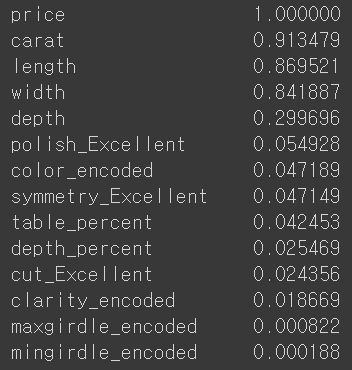

In [6]:
dataset1 = pd.read_csv("/content/drive/MyDrive/ECE ENGR 219/diamonds_ece219.csv")
dataset1 = dataset1.drop(columns=['Unnamed: 0'])

In [7]:
dataset1.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


In [8]:
# Inspect non-numerical features

print('color : ', np.unique(dataset1["color"]))
print('clarity : ', np.unique(dataset1["clarity"]))
print('cut : ', np.unique(dataset1["cut"]))
print('symmetry : ', np.unique(dataset1["symmetry"]))
print('polish : ', np.unique(dataset1["polish"]))
print('girdle_min : ', np.unique(dataset1["girdle_min"]))
print('girdle_max : ', np.unique(dataset1["girdle_max"]))

color :  ['D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M']
clarity :  ['I1' 'I2' 'I3' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']
cut :  ['Excellent' 'Very Good']
symmetry :  ['Excellent' 'Very Good']
polish :  ['Excellent' 'Very Good']
girdle_min :  ['M' 'STK' 'STN' 'TK' 'TN' 'VTK' 'VTN' 'XTK' 'XTN' 'unknown']
girdle_max :  ['M' 'STK' 'STN' 'TK' 'TN' 'VTK' 'VTN' 'XTK' 'XTN' 'unknown']


In [9]:
dataset2 = dataset1.copy(deep=True)

In [10]:
#Numerical Encodings
# label based on context https://www.brilliantearth.com/diamond/buying-guide/clarity/?nbt=nb%3Aadwords%3Ag%3A13196368544%3A134246532224%3A548694297825&nb_adtype=&nb_kwd=diamond%20size%20chart&nb_ti=kwd-1701737760&nb_mi=&nb_pc=&nb_pi=&nb_ppi=&nb_placement=&nb_li_ms=&nb_lp_ms=&nb_fii=&nb_ap=&nb_mt=b&utm_source=google&utm_medium=cpc&utm_campaign=SEM_Search_US_ER_Education&nbt=nb%3Aadwords%3Ag%3A13196368544%3A134246532224%3A548694297825&nb_adtype=&nb_kwd=diamond%20size%20chart&nb_ti=kwd-1701737760&nb_mi=&nb_pc=&nb_pi=&nb_ppi=&nb_placement=&nb_li_ms=&nb_lp_ms=&nb_fii=&nb_ap=&nb_mt=b&gad_source=1&gclid=CjwKCAiA0PuuBhBsEiwAS7fsNSH3F3yQJukq_W6s7Py1nw-63ZxzmUhDPVoIYxBu_GLXcBSnnWBaDhoCxGIQAvD_BwE

color_dict = {'M' : 1, # Faint Color Diamond Grades
              'L' : 2,
              'K' : 3,
              'J' : 4, # Near Colorless Diamond Grades
              'I' : 5,
              'H': 6,
              'G': 7,
              'F': 8, # Colorless Diamond Grades
              'E': 9,
              'D': 10
              }


clarity_dict = {'I3' : 1, # included 3
                'l2' : 2, # included 2
                'l1' : 3, # included 1
                'SI2' : 4, # slightly included 2
                'SI1': 5, # slightly included 1
                'VS2': 6, # very slightly included 2
                'VS1': 7, # very slightly included 1
                'VVS2': 8, # very, very slightly included 2
                'VVS1': 9, # very, very slightly included 1
                'IF': 10 # Internally Flawless
                }

girdle_dict = {'unknown' : 0,
               'XTN' : 1, # extremely thin
               'VTN' : 2, # very thin
               'TN' : 3, # thin
               'STN' : 4, # slightly thin
               'M' : 5, # medium
               'STK' : 6, # slightly thick
               'TK' : 7, # thick
               'VTK' : 8, # very thick
               'XTK' : 9, # extremely thick
               }

In [11]:
dataset2 = pd.get_dummies(dataset2, columns=['cut', 'symmetry', 'polish'])
dataset2['color_encoded'] = dataset2.color.map(color_dict)
dataset2['clarity_encoded'] = dataset2.clarity.map(clarity_dict)
dataset2['mingirdle_encoded'] = dataset2.girdle_min.map(girdle_dict)
dataset2['maxgirdle_encoded'] = dataset2.girdle_max.map(girdle_dict)

In [12]:
diamonds = dataset2.drop(columns=['color','clarity', 'girdle_min', 'girdle_max', 'cut_Very Good', 'symmetry_Very Good', 'polish_Very Good'])
diamonds.dropna()
# move price to last column
diamonds = diamonds[[col for col in diamonds.columns if col != 'price'] + ['price']]

In [13]:
diamonds.head()

,carat,depth_percent,table_percent,length,width,depth,cut_Excellent,symmetry_Excellent,polish_Excellent,color_encoded,clarity_encoded,mingirdle_encoded,maxgirdle_encoded,price
0,0.09,62.7,59.0,2.85,2.87,1.79,1,0,0,9,8.0,5,5,200
1,0.09,61.9,59.0,2.84,2.89,1.78,0,0,0,9,8.0,6,6,200
2,0.09,61.1,59.0,2.88,2.90,1.77,1,0,0,9,8.0,3,5,200
3,0.09,62.0,59.0,2.86,2.88,1.78,1,0,0,9,8.0,5,6,200
4,0.09,64.9,58.5,2.79,2.83,1.82,0,0,1,9,8.0,6,6,200


Text(0.5, 1.0, 'Absolute Correlation Between Variables')

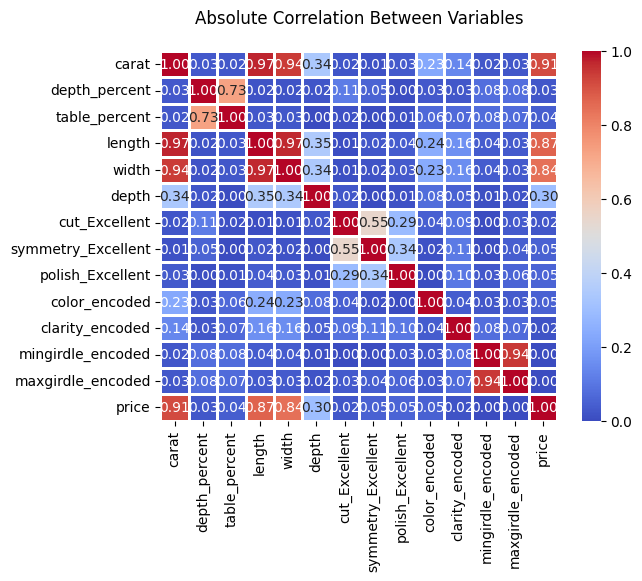

In [14]:
import seaborn as sns

corr = diamonds.corr().abs()
sns.heatmap(corr, vmin=0, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=2)
plt.title("Absolute Correlation Between Variables", pad=20)

In [15]:
corr_target = diamonds.corrwith(diamonds["price"]).abs()
print(corr_target.sort_values(ascending=False))

price                 1.000000
carat                 0.913479
length                0.869521
width                 0.841887
depth                 0.299696
polish_Excellent      0.054928
color_encoded         0.047189
symmetry_Excellent    0.047149
table_percent         0.042453
depth_percent         0.025469
cut_Excellent         0.024356
clarity_encoded       0.018669
maxgirdle_encoded     0.000822
mingirdle_encoded     0.000188
dtype: float64


**Question 1.2**

Plot the histogram of numerical features.
- shown below

What preprocessing can be done if the distribution of a feature has high skewness?
- High skewness means a distribution curve has a shorter tail on one end a distribution curve and a long tail on the other. In other words, it means that the data set the data is not evenly distributed and the data points favor one side of the distribution due to the nature of the underlying data.

- There are various ways to transform data skewness, depending on the type and degree of skewness, and the goal of the transformation.
For reducing positive skewness only, logarithmic transformation(apply natural logarithm function to data) and square root transformation(apply square root function to data) could be used. Logarithmic transformation cannot handle negative or zero values, while square root transformation can handle zero.

- For reducing both positive and negative skewness, cube root transformation is useful for data that follows a skewed normal distribution, also able to handle zero, negatie, and positive variables. Box-Cox transformation and Yeo-Johnson transformation applies a power function to minimize skewness, but parameter estimation is required for both of these methods, which can be done through maximum likelihood or cross-validation.

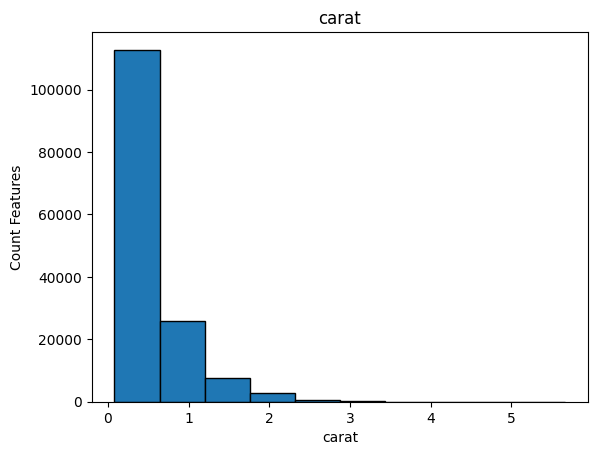

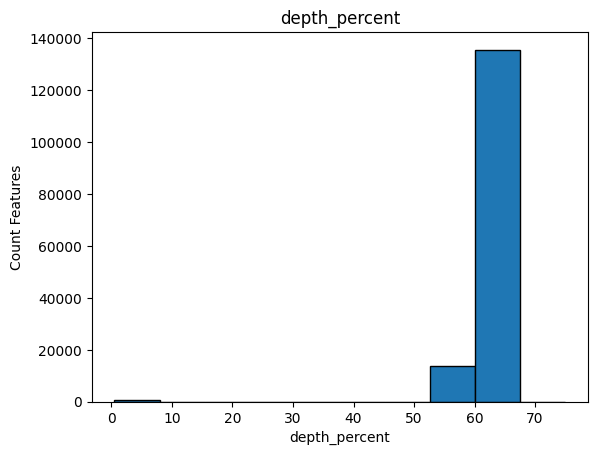

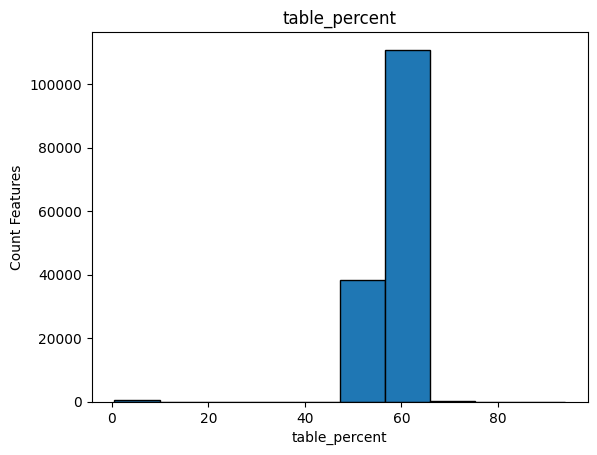

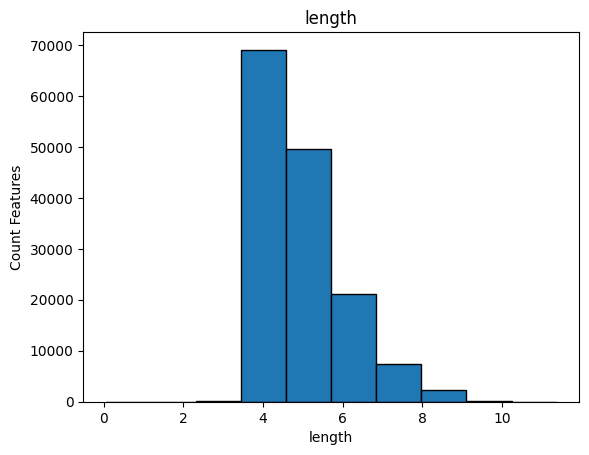

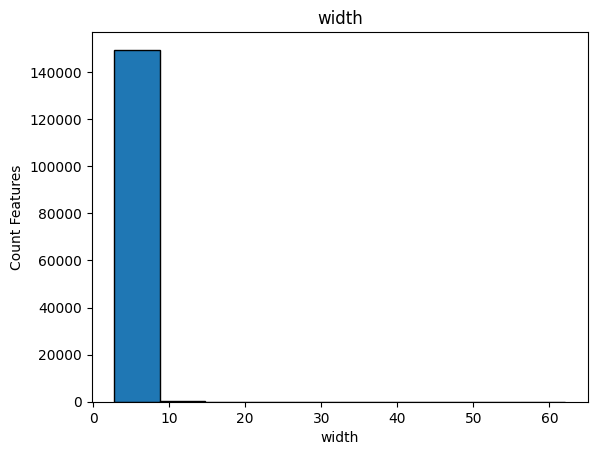

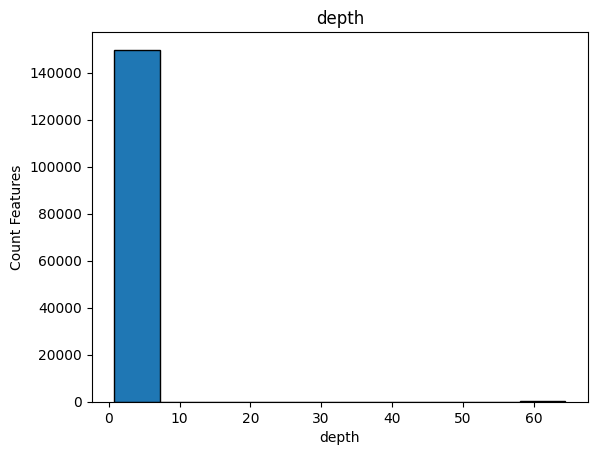

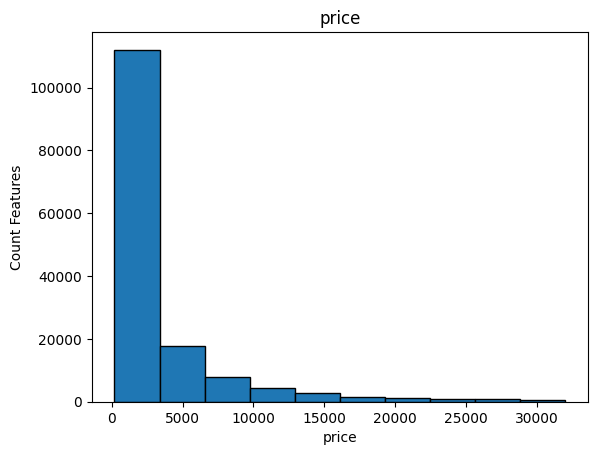

In [16]:
num_features = ['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth', 'price']

for i in np.arange(len(num_features)) :
  plt.figure()
  plt.hist(diamonds[num_features[i]], edgecolor = "black")
  plt.xlabel(f"{num_features[i]}");
  plt.ylabel("Count Features");
  plt.title(f"{num_features[i]}")

**Question 1.3**

Construct and inspect the box plot of categorical features vs target variable. What do you find?

- Categorical and Price seperately
  - price box has a huge outlier
  - color and clarity has smae median
  - girdle is highly skewed
- Categorical vs Price
  - there are many outliers for each categorical feature, meaning that there are a significant number of samples that fall out of the box plots based on the inter-quartile range.


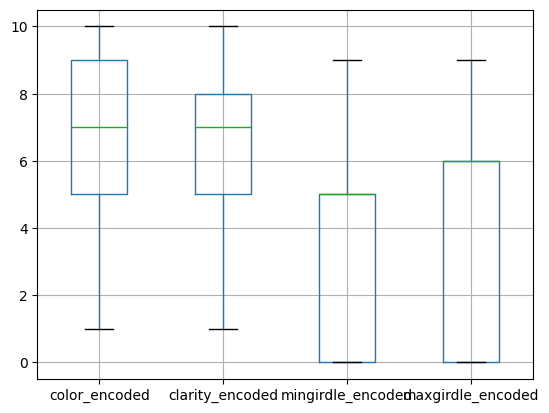

In [17]:
boxplot = diamonds.boxplot(column = ['color_encoded', 'clarity_encoded', 'mingirdle_encoded', 'maxgirdle_encoded'])

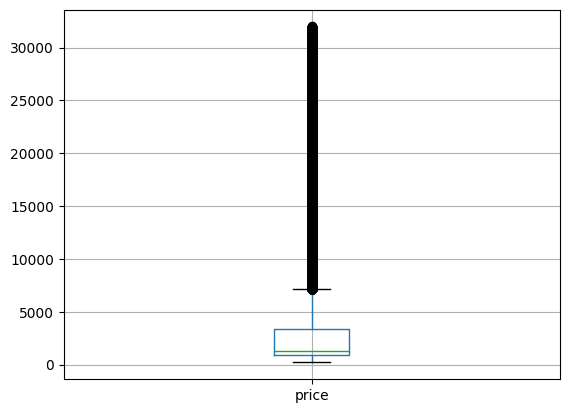

In [18]:
boxplot_p = diamonds.boxplot(column = ['price'])

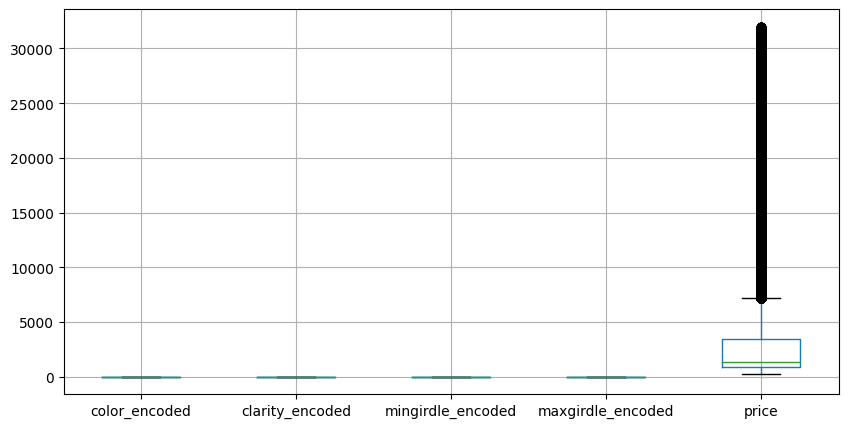

In [19]:
box_c = diamonds.boxplot(column = ['color_encoded', 'clarity_encoded', 'mingirdle_encoded', 'maxgirdle_encoded', 'price'], figsize=(10,5))

<Axes: xlabel='maxgirdle_encoded', ylabel='price'>

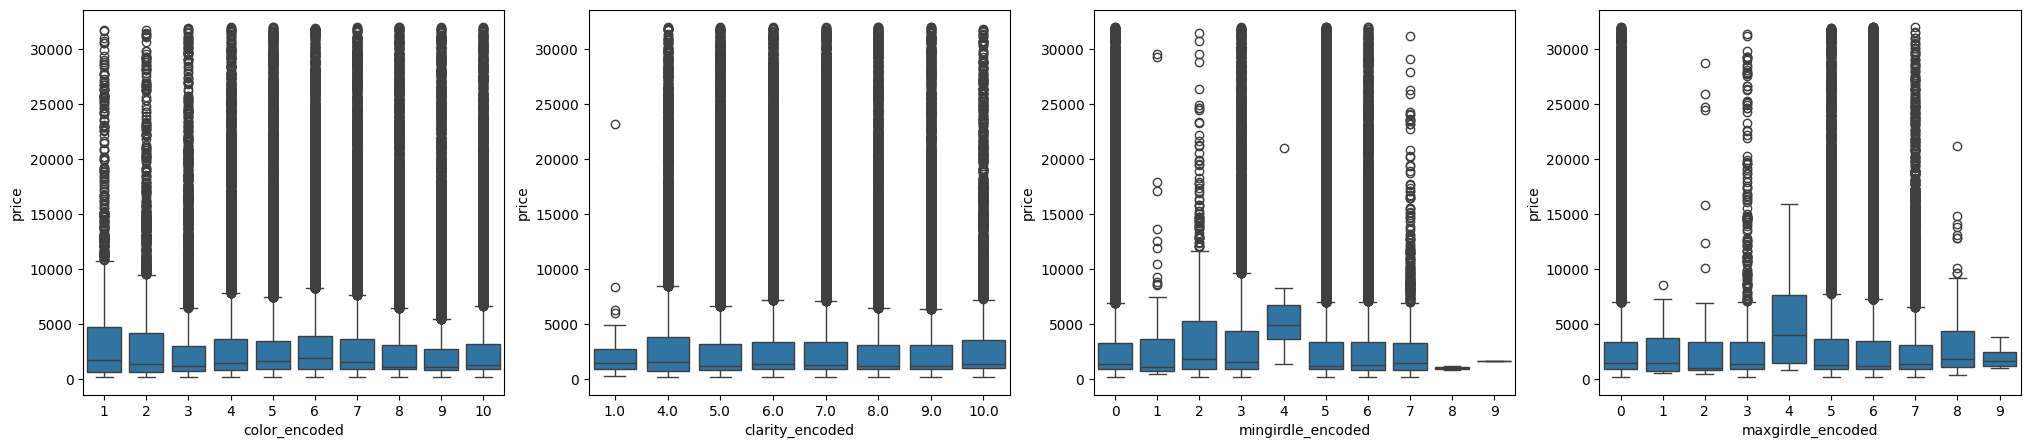

In [20]:
fig, axs = plt.subplots(1,4,figsize=(25,5))
sns.boxplot(data=diamonds.sort_values("color_encoded"),x="color_encoded", y="price", ax=axs[0])
sns.boxplot(data=diamonds.sort_values("clarity_encoded"),x="clarity_encoded", y="price", ax=axs[1])
sns.boxplot(data=diamonds.sort_values("mingirdle_encoded"),x="mingirdle_encoded", y="price", ax=axs[2])
sns.boxplot(data=diamonds.sort_values("maxgirdle_encoded"),x="maxgirdle_encoded", y="price", ax=axs[3])

**Question 1.4**

For the Diamonds dataset, plot the counts by color, cut and clarity.  
For the wine quality dataset, plot histogram for quality scores.

Text(0.5, 1.0, 'Clarity')

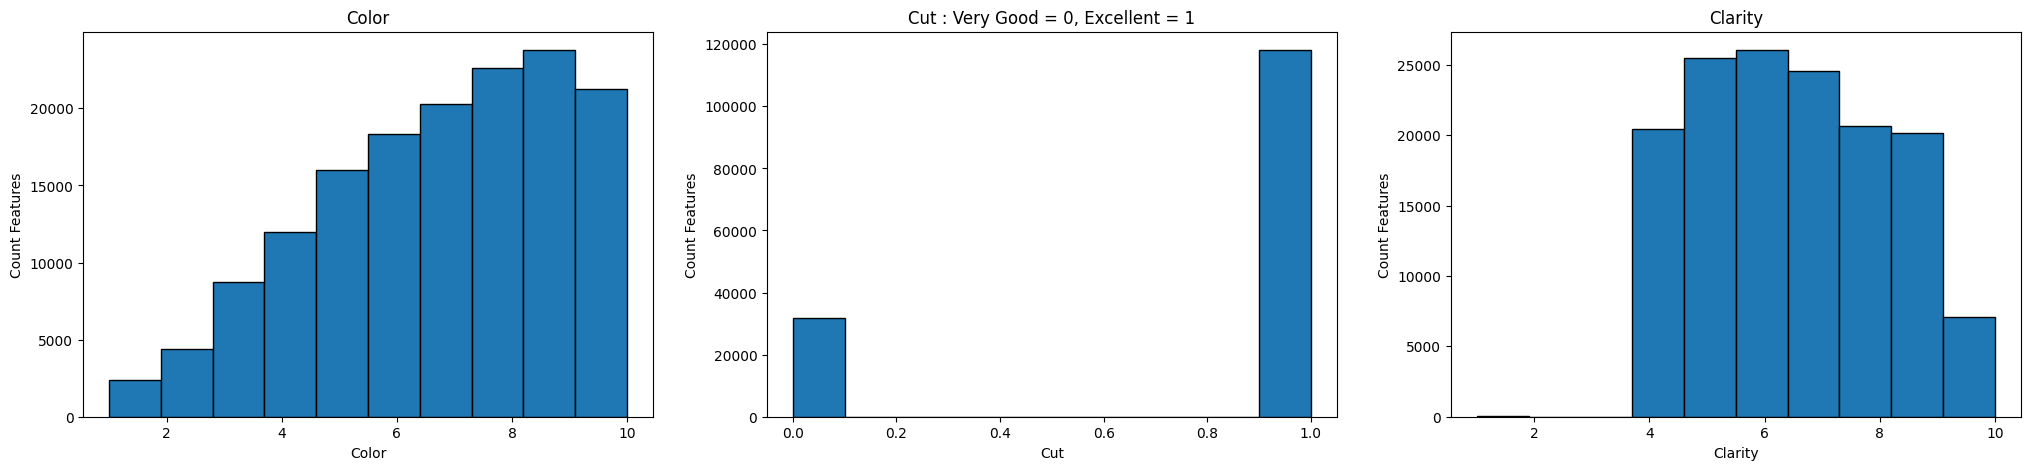

In [21]:
fig, axs = plt.subplots(1,3,figsize=(25,5))

plt.subplot(1, 3, 1)
plt.hist(diamonds['color_encoded'], edgecolor = "black")
plt.xlabel("Color")
plt.ylabel("Count Features")
plt.title("Color")

plt.subplot(1, 3, 2)
plt.hist(diamonds['cut_Excellent'], edgecolor = "black")
plt.xlabel("Cut")
plt.ylabel("Count Features");
plt.title("Cut : Very Good = 0, Excellent = 1")

plt.subplot(1, 3, 3)
plt.hist(diamonds['clarity_encoded'], edgecolor = "black")
plt.xlabel("Clarity")
plt.ylabel("Count Features")
plt.title("Clarity")

## 3.1.3 Standardization

**Question 2.1**

Standardize feature columns and prepare them for training.

In [22]:
from sklearn.preprocessing import StandardScaler

d_scale = StandardScaler()

In [23]:
from sklearn.model_selection import train_test_split

diamonds = diamonds.dropna(axis=0)
Xd = diamonds.loc[:, diamonds.columns != 'price']
Yd = diamonds.price

X_train, X_test, y_train, y_test = train_test_split(Xd, Yd, test_size=0.2, random_state=42)

In [24]:
Xtrain_s = d_scale.fit_transform(X_train, y_train)
Xtrain_s = Xtrain_s[:, ~np.isnan(Xtrain_s).any(axis=0)]
Xtest_s = d_scale.transform(X_test)

## 3.1.4 Feature Selection

**Question 2.2**

. sklearn.feature selection.mutual_info_regression  
. sklearn.feature selection.f_regression  

You **may** use these functions to select features that yield better regression results (especially in the classical models).

Describe how this step qualitatively affects the performance of your models in terms of test RMSE. Is it true for all model types? Also list two features for either dataset that has the lowest MI w.r.t to the target.
 - mutual information regression and f regrassion shows the relevance between the given features and the target feature. By looking at these scores, we can select the features that has significant relevence with the target value, making the model performance better.
 - As F-test captures only linear dependency, mutual information can capture any kind of dependency between variables, enabling to show more accurant relevance between features for most of the cases.
 - The two features with lowest MI are table percent and polish.

From this point on, you are free to use any combination of features, as long as the performance on the regression model is on par (or slightly worse) than the Neural Network model.
- We tried various choices of feature selection, and found out that the regression gives the best result(lowest rmse) when we use all the features. Therefore we chose to select every features.

In [ ]:
from sklearn.feature_selection import mutual_info_regression, f_regression

In [ ]:
mi = mutual_info_regression(Xtrain_s, y_train)

In [ ]:
mi

array([1.37932702, 0.04128527, 0.02304781, 1.20800748, 1.21706893,
       1.16895949, 0.03058611, 0.02753621, 0.01147866, 0.18303087,
       0.14816494, 0.02659134, 0.0402315 ])

In [ ]:
mi_info = (
    pd.DataFrame({
        'feature_name': diamonds.columns[0:13],
        'mutual information score': mi
    })
    .sort_values('mutual information score', ascending=False)
    .reset_index(drop=True)
)
print(mi_info)

          feature_name  mutual information score
0                carat                  1.379327
1                width                  1.217069
2               length                  1.208007
3                depth                  1.168959
4        color_encoded                  0.183031
5      clarity_encoded                  0.148165
6        depth_percent                  0.041285
7    maxgirdle_encoded                  0.040232
8        cut_Excellent                  0.030586
9   symmetry_Excellent                  0.027536
10   mingirdle_encoded                  0.026591
11       table_percent                  0.023048
12    polish_Excellent                  0.011479


In [ ]:
f_statistic, p_values = f_regression(Xtrain_s, y_train)

In [ ]:
print(f_statistic)
print(p_values)

[6.20037878e+05 6.88053174e+01 2.03046214e+02 3.75155313e+05
 2.81714962e+05 1.13292868e+04 8.05690760e+01 2.95598960e+02
 4.04957886e+02 2.68679769e+02 4.90295856e+01 1.58103740e+00
 2.53383889e+00]
[0.00000000e+00 1.09830063e-16 4.94508605e-46 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.84785112e-19 3.62361296e-66
 6.54869905e-90 2.57556344e-60 2.53498221e-12 2.08613868e-01
 1.11431563e-01]


In [ ]:
f_info = (
    pd.DataFrame({
        'feature_name': diamonds.columns[0:13],
        'f statistic score': f_statistic
    })
    .sort_values('f statistic score', ascending=False)
    .reset_index(drop=True)
)
print(f_info)

          feature_name  f statistic score
0                carat      620037.877719
1               length      375155.312920
2                width      281714.962264
3                depth       11329.286814
4     polish_Excellent         404.957886
5   symmetry_Excellent         295.598960
6        color_encoded         268.679769
7        table_percent         203.046214
8        cut_Excellent          80.569076
9        depth_percent          68.805317
10     clarity_encoded          49.029586
11   maxgirdle_encoded           2.533839
12   mingirdle_encoded           1.581037


In [ ]:
p_info = (
    pd.DataFrame({
        'feature_name': diamonds.columns[0:13],
        'p value score': p_values
    })
    .sort_values('p value score', ascending=False)
    .reset_index(drop=True)
)
print(p_info)

          feature_name  p value score
0    mingirdle_encoded   2.086139e-01
1    maxgirdle_encoded   1.114316e-01
2      clarity_encoded   2.534982e-12
3        depth_percent   1.098301e-16
4        cut_Excellent   2.847851e-19
5        table_percent   4.945086e-46
6        color_encoded   2.575563e-60
7   symmetry_Excellent   3.623613e-66
8     polish_Excellent   6.548699e-90
9                carat   0.000000e+00
10              length   0.000000e+00
11               width   0.000000e+00
12               depth   0.000000e+00


# 3.2 Training  
Once the data is prepared, we would like to train multiple algorithms and compare their performance using average RMSE from 10-fold cross-validation (please refer to part 3.3).

# 3.3 Evaluation  
Perform 10-fold cross-validation and measure average RMSE errors for training and validation sets.
For random forest model, measure “Out-of-Bag Error” (OOB) as well.

In [25]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

'''
def RMSE_10fold(model, X, y, k=10) :
  kf = KFold(n_splits=k)
  score = cross_val_score(model, X, y, cv= kf, scoring="neg_mean_squared_error")
  rms_avg = np.mean(-score)
  rms_avg = np.sqrt(rms_avg)
  return rms_avg
'''

def RMSE_10fold(model, X, y) :
  score = cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error')
  rmse_avg = np.mean(-score)
  return rmse_avg

## 3.3.1 Linear Regression

What is the objective function? Train three models:  
(a) ordinary least squares (linear regression without regularization),  
(b) Lasso  
(c) Ridge regression

**Question 4.1**

Explain how each regularization scheme affects the learned parameter set.

 - Lasso uses L1-norm regularization and Ridge uses L2-norm regularization with the base of linear regression.

 The L1 norm is calculated as the sum of the absolute vector values, where the absolute value of a scalar uses the notation |a1|. In effect, the norm is a calculation of the Manhattan distance from the origin of the vector space.

 The L2 norm calculates the distance of the vector coordinate from the origin of the vector space, calculated as the square root of the sum of the squared vector values. As such, it is calculated as the Euclidean distance from the origin. The result is a positive distance value.

 As L2 is Euclidean distance, there is always one right answer as to how to get between two points fastest. On the other side, as L1 is the Manhattan distance, there are many solutions to getting between two points.

In [ ]:
lr = LinearRegression()
lr.fit(Xtrain_s, y_train)
y_pred_lr = lr.predict(Xtest_s)
score_lr = lr.score(Xtest_s, y_test)
print("Linear Regression Accuracy:", score_lr)
print("Avg RMSE LR = ", RMSE_10fold(lr, Xtest_s, y_test))

Linear Regression Accuracy: 0.8907552739552268
Avg RMSE LR =  1571.4483649983126


In [ ]:
print("Linear Regression Weights : ", lr.coef_)
print("Linear Regression Bias : ", lr.intercept_)

Linear Regression Weights :  [ 5.64845530e+03 -1.46482586e+02  1.10358163e+02 -1.06174252e+03
 -3.73435693e+01 -2.20405064e+01  9.39880808e+01  3.82422549e+01
  4.61987256e+00  7.99187081e+02  4.63345029e+02 -1.40629273e+02
  2.01948312e+02]
Linear Regression Bias :  3279.35935931605


Lasso model is a regression model where loss function is the linear least squares function(linear regression) with L1-norm regularization.

In [20]:
lasso = Lasso(alpha=0.1)
lasso.fit(Xtrain_s, y_train)

y_pred_lasso = lasso.predict(Xtest_s)
score_lasso = lasso.score(Xtest_s, y_test)

print("Lasso Accuracy = ", score_lasso)
print("Avg RMSE Lasso = ", RMSE_10fold(lasso, Xtest_s, y_test))

Lasso Accuracy =  0.8907502349265347


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+09, tolerance: 5.785e+07
  model = cd_fast.enet_coordinate_descent(


Avg RMSE Lasso =  1567.9597373937333


In [ ]:
print("Lasso Weights : ", lasso.coef_)
print("Lasso Bias : ", lasso.intercept_)

Lasso Weights :  [ 5.64456686e+03 -1.46009221e+02  1.09893821e+02 -1.05795284e+03
 -3.72360250e+01 -2.20477118e+01  9.39063278e+01  3.81349687e+01
  4.50849853e+00  7.99166392e+02  4.63371151e+02 -1.38648305e+02
  1.99997850e+02]
Lasso Bias :  3279.35935931605


Ridge model is a regression model where loss function is the linear least squares function(linear regression) with L2-norm regularization.

In [21]:
ridge = Ridge(alpha=0.1)
ridge.fit(Xtrain_s, y_train)

y_pred_r = ridge.predict(Xtest_s)
score_ridge = ridge.score(Xtest_s, y_test)
print("Ridge Accuracy = ", score_ridge)
print("Avg RMSE Ridge = ", RMSE_10fold(ridge, Xtest_s, y_test))

Ridge Accuracy =  0.8907551595222356
Avg RMSE Ridge =  1571.4444475369896


In [ ]:
print("Ridge Weights : ", ridge.coef_)
print("Ridge Bias : ", ridge.intercept_)

Ridge Weights :  [ 5.64834834e+03 -1.46479196e+02  1.10355138e+02 -1.06162739e+03
 -3.73534165e+01 -2.20413546e+01  9.39868392e+01  3.82416242e+01
  4.61979830e+00  7.99187339e+02  4.63347070e+02 -1.40623735e+02
  2.01943619e+02]
Ridge Bias :  3279.35935931605


**Question 4.2**

Report your choice of the best regularization scheme along with the optimal penalty parameter and explain how you computed it.
 - optimal penalty parameter is the 'alpha' in function
 - Lasso : {'alpha': 0.01, 'max_iter': 2000, 'selection': 'random', 'tol': 0.0001}

 - Ridge : {'alpha': 0.01, 'max_iter': 2000, 'solver': 'sag', 'tol': 0.01}

 - we used GridSearchCV function to search the best parameters for each functions

In [22]:
grids_l = {'alpha' : [0.01, 0.1, 1, 10],
         'max_iter' : np.arange(500, 2500, 500),
         'tol' : [1e-4, 1e-3, 1e-2],
         'selection' : ['cyclic', 'random']
        }

In [23]:
# define search
search = GridSearchCV(lasso, grids_l, scoring='neg_mean_absolute_error', cv=KFold(n_splits=10), n_jobs=-1, error_score=0)
# perform the search
results = search.fit(Xtrain_s, y_train)
# summarize
print('RMSE: %.6f' % -results.best_score_)
print('Config: %s' % results.best_params_)

RMSE: 874.596263
Config: {'alpha': 0.01, 'max_iter': 2000, 'selection': 'random', 'tol': 0.0001}


In [ ]:
from sklearn.model_selection import GridSearchCV
# define grid
grids_r = {'alpha' : (0.01, 10, 0.1),
         'max_iter' : (100, 2000, 100),
         'tol' : (1e-4, 1e-2, 1e-3),
         'solver' : ['cholesky', 'lsqr', 'svd', 'sag', 'saga', 'auto', 'sparse_cg']
        }

In [ ]:
# define search
search = GridSearchCV(ridge, grids_r, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, error_score=0)
# perform the search
results = search.fit(Xtrain_s, y_train)
# summarize
print('RMSE: %.6f' % -results.best_score_)
print('Config: %s' % results.best_params_)

RMSE: 874.008188
Config: {'alpha': 0.01, 'max_iter': 2000, 'solver': 'sag', 'tol': 0.01}


**Question 4.3**

Does feature standardization play a role in improving the model performance (in the cases with ridge regularization)? Justify your answer.

 - Feature standardization does play a role in improving the model performance, but in a very small scale for the given dataset.

 - Feature standardization makes the values of each feature in the data have zero-mean (subtract the mean in the numerator) and unit-variance. However, StandardScaler is sensitive to outliers, and the features may scale differently from each other in the presence of outliers. By question 1.3, we can see that the categorical features have a large set of outliers with the price. This could be the reason of the standardization having less effect of improving the performance.

In [ ]:
ridge_ns = Ridge(alpha=0.01, max_iter=2000, solver='sag', tol=0.01)
ridge_ns.fit(X_train, y_train)

y_pred_r_ns = ridge_ns.predict(X_test)
score_ridge_ns = ridge_ns.score(X_test, y_test)

rmse_ridge_ns = RMSE_10fold(ridge_ns, X_test, y_test)

print("Non Standardization Ridge Accuracy = ", score_ridge_ns)

print("Non Standardization Ridge Avg RMSE = ", rmse_ridge_ns)

Non Standardization Ridge Accuracy =  0.8901293343307807
Non Standardization Ridge Avg RMSE =  1608.3354617425325


In [ ]:
ridge_s = Ridge(alpha=0.01, max_iter=2000, solver='sag', tol=0.01)
ridge_s.fit(Xtrain_s, y_train)

y_pred_r_s = ridge_s.predict(Xtest_s)
score_ridge_s = ridge_s.score(Xtest_s, y_test)

rmse_ridge_s = RMSE_10fold(ridge_s, Xtest_s, y_test)

print("Standardization Ridge Accuracy = ", score_ridge_s)
print("Standardization Ridge Avg RMSE = ", rmse_ridge_s)

Standardization Ridge Accuracy =  0.8907121259395575
Standardization Ridge Avg RMSE =  1571.9259501298427


**Question 4.4**

Some linear regression packages return p-values for different features. (E.g: scipy.stats.linregress and statsmodels.regression.linear model.OLS)

What is the meaning of these p-values and how can you infer the most significant features? A qualitative reasoning is sufficient.
- The p-values in regression models are a statistical number to conclude if there is a relationship between the given feature and the target feature. It helps to see if the relationships that we observe in a sample also exist in the larger population. When a p value is large, it indicates there is insufficient evidence in your sample to conclude that a non-zero correlation exists. So this means that those features are not helpful in determining the target value, in this case the price.

In [ ]:
from scipy.stats import linregress

In [ ]:
slope, intercept, r, p, se = linregress(Xtrain_s[:,0].T, y_train)
print('p value for carat feature with price : ',p)

p value for carat feature with price is:  0.0


In [ ]:
slope, intercept, r, p, se = linregress(Xtrain_s[:,11].T, y_train)
print('p value for girdle_min feature with price : ',p)

p value for girdle_min feature with price is:  0.20861386806642787


## 3.3.2 Polynomial Regression

Perform polynomial regression by crafting products of features you selected in part 3.1.4 up to a certain degree (max degree 6) and applying ridge regression on the compound features. You can use scikit-learn library to build such features. Avoid overfitting by proper regularization. Answer the following:

**Question 5.1**

What are the most salient features? Why?

- the most salient features are carat, depth, and width
- the salient(important) features has larger weight(ceofficient). In polynomial features, the features are multiplied with another feature, so we can find the feature importance by inspecting the combination of features. As carat, depth, and width composes the hightest polynomial coefficients, we can conclude that they have the largest weight individually also.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
pr = PolynomialFeatures(degree = 3)
X_poly = pr.fit_transform(Xtrain_s)
r_poly = Ridge(alpha=0.01)
r_poly.fit(X_poly, y_train)
y_pred_poly = r_poly.predict(X_poly)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred_poly))
r2 = r2_score(y_train, y_pred_poly)

print("RMSE : ", rmse)
print("R2 score : ", r2)

RMSE :  703.4698060366562
R2 score :  0.9776251173563598


In [ ]:
pol_feat = (
    pd.DataFrame({
        'feature_name': pr.get_feature_names_out(input_features=Xd.columns),
        'polynomial feaures coefficient': np.abs(r_poly.coef_)
    })
    .sort_values('polynomial feaures coefficient', ascending=False)
    .reset_index(drop=True)
)
print(pol_feat.head())

                feature_name  polynomial feaures coefficient
0                carat depth                     6690.213975
1                width depth                     4079.548139
2             carat^2 length                     3448.230409
3  carat width color_encoded                     3381.887668
4              carat^2 width                     3125.428435


In [ ]:
X_t_poly = pr.fit_transform(Xtest_s)
r_poly = Ridge(alpha=0.1)
r_poly.fit(X_poly, y_train)
yt_pred_poly = r_poly.predict(X_t_poly)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, yt_pred_poly))
r2 = r2_score(y_test, yt_pred_poly)

print("RMSE : ", rmse)
print("R2 score : ", r2)

RMSE :  729.0126713067305
R2 score :  0.9763685876177075


**Question 5.2**

What degree of polynomial is best? How did you find the optimal degree? What does a very high-order polynomial imply about the fit on the training data? What about its performance on testing data?

- Degree of 3 of polynomial works best as it has the smallest RMSE with high score for the test dataset.
- This optimal degree was found by trying the individual dregrees from 2 to 4, as degree of 1 is linear regresison.
- With degree over 4, the model training showed overfitting to the training dataset, giving hight score for the training dataset but functioning very badly for the testing dataset.

In [ ]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"

  poly_features = PolynomialFeatures(degree=degree)

  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(Xtrain_s)

  # fit the transformed features to Linear Regression
  poly_model = Ridge(alpha=0.1)
  poly_model.fit(X_train_poly, y_train)

  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)

  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(Xtest_s))

  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)

  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)

  print("Model performance for the training set")
  print("-----------------------------------------")
  print("Train set RMSE = {}".format(rmse_train))
  print("Train set R2 score = {}".format(r2_train))

  print("\n")

  print("Model performance for the test set")
  print("-----------------------------------------")
  print("Test set RMSE = {}".format(rmse_test))
  print("Test set R2 score = {}".format(r2_test))
  print("--------------------------------------------------------")

In [ ]:
# this requires large size RAM(colab pro) from defree 5
for i in np.arange(2, 5) :
  print("\n")
  print("Degree = ", i)
  create_polynomial_regression_model(i)



Degree =  2
Model performance for the training set
-----------------------------------------
Train set RMSE = 832.6080377475163
Train set R2 score = 0.968656243761814


Model performance for the test set
-----------------------------------------
Test set RMSE = 817.9738745442479
Test set R2 score = 0.9702492176638191
--------------------------------------------------------


Degree =  3
Model performance for the training set
-----------------------------------------
Train set RMSE = 703.5671366306475
Train set R2 score = 0.9776189254451941


Model performance for the test set
-----------------------------------------
Test set RMSE = 729.0126713067305
Test set R2 score = 0.9763685876177075
--------------------------------------------------------


Degree =  4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.06147e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model performance for the training set
-----------------------------------------
Train set RMSE = 647.5027228471321
Train set R2 score = 0.9810437232302042


Model performance for the test set
-----------------------------------------
Test set RMSE = 14988.169267570729
Test set R2 score = -8.988877866656368
--------------------------------------------------------


## 3.3.3 Neural Network
 You will train a multi-layer perceptron (fully connected neural network). You can simply
 use the sklearn implementation:

**Question 6.1**

Adjust your network size (number of hidden neurons and depth), and weight decay
as regularization. Find a good hyper-parameter set systematically (no more than
20 experiments in total).

In [ ]:
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import GridSearchCV


In [ ]:
lst = np.arange(10, 101, 40)
print(lst)
layers = []
for n in [1, 2]:
  combs = list(itertools.combinations_with_replacement(lst, n))
  print(combs)
  layers.extend(combs)

print(len(layers))

[10 50 90]
[(10,), (50,), (90,)]
[(10, 10), (10, 50), (10, 90), (50, 50), (50, 90), (90, 90)]
9


In [ ]:
params = {'hidden_layer_sizes': layers}
nn = MLPRegressor(random_state=42, max_iter=1000)
gs = GridSearchCV(nn, params, cv=2, n_jobs=1, scoring='neg_root_mean_squared_error', verbose=2, return_train_score=True)

gs.fit(X_poly, y_train)
print("Best Config:", gs.best_params_)
print("Best RMSE:", -gs.best_score_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ...........................hidden_layer_sizes=(10,); total time=  29.3s
[CV] END ...........................hidden_layer_sizes=(10,); total time=  59.5s
[CV] END ...........................hidden_layer_sizes=(50,); total time=  40.8s
[CV] END ...........................hidden_layer_sizes=(50,); total time=  49.9s
[CV] END ...........................hidden_layer_sizes=(90,); total time=  55.9s
[CV] END ...........................hidden_layer_sizes=(90,); total time=  47.0s
[CV] END ........................hidden_layer_sizes=(10, 10); total time=  52.3s
[CV] END ........................hidden_layer_sizes=(10, 10); total time= 3.1min
[CV] END ........................hidden_layer_sizes=(10, 50); total time= 4.6min
[CV] END ........................hidden_layer_sizes=(10, 50); total time= 5.1min
[CV] END ........................hidden_layer_sizes=(10, 90); total time= 2.9min
[CV] END ........................hidden_layer_siz

In [ ]:
params = {'activation': ['identity','relu','tanh','logistic']}
nn = MLPRegressor(hidden_layer_sizes=(10,50), random_state=42, max_iter=1000)
gs = GridSearchCV(nn, params, cv=2, n_jobs=1, scoring='neg_root_mean_squared_error', verbose=3, return_train_score=True)

gs.fit(X_poly, y_train)
print("Best Config:", gs.best_params_)
print("Best RMSE:", -gs.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END activation=identity;, score=(train=-910.243, test=-996.976) total time=  38.0s
[CV 2/2] END activation=identity;, score=(train=-861.017, test=-804.003) total time=  37.5s
[CV 1/2] END activation=relu;, score=(train=-599.045, test=-658.524) total time= 4.8min
[CV 2/2] END activation=relu;, score=(train=-607.008, test=-701.577) total time= 5.4min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh;, score=(train=-1803.865, test=-1832.126) total time=12.4min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh;, score=(train=-1816.560, test=-1814.817) total time=12.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic;, score=(train=-1800.807, test=-1829.220) total time= 8.8min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic;, score=(train=-1812.426, test=-1807.335) total time= 9.1min
Best Config: {'activation': 'relu'}
Best RMSE: -680.0506720277828


In [ ]:
params = {'alpha': [10.0**x for x in np.arange(-2,3)]}
nn = MLPRegressor(hidden_layer_sizes=(10,50), activation='relu', random_state=42, max_iter=1000)
gs = GridSearchCV(nn, params, cv=2, n_jobs=1, scoring='neg_root_mean_squared_error', verbose=2, return_train_score=True)

gs.fit(X_poly, y_train)
print("Best Config:", gs.best_params_)
print("Best RMSE:", -gs.best_score_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END .........................................alpha=0.01; total time= 2.4min
[CV] END .........................................alpha=0.01; total time= 4.6min
[CV] END ..........................................alpha=0.1; total time= 3.3min
[CV] END ..........................................alpha=0.1; total time= 4.2min
[CV] END ..........................................alpha=1.0; total time= 4.3min
[CV] END ..........................................alpha=1.0; total time= 3.0min
[CV] END .........................................alpha=10.0; total time=  36.6s
[CV] END .........................................alpha=10.0; total time= 4.6min
[CV] END ........................................alpha=100.0; total time=  40.3s
[CV] END ........................................alpha=100.0; total time= 2.2min
Best Config: {'alpha': 0.01}
Best RMSE: -704.2584275880779


**Question 6.2**

How does the performance generally compare with linear regression? Why?

- The performance is generally better than linear regression.
- Linear regression assumes a linear relationship while a neural network can model non-linear relationships in data.
- Neural networks can also automatically learn relevant features from the data.
- Hyperparameters also allow neural networks to offer more flexibility in model architecture.

**Question 6.3**

What activation function did you use for the output and why? You may use none.
- Relu: the rectified linear unit function, returns f(x) = max(0, x)
- This gave us the best RMSE out of the 4 options from gridsearch.

**Question 6.4**

What is the risk of increasing the depth of the network too far?

- A network that is too deep can lead to overfitting because of a higher capacity to memorize the training data causing it to fail to generalize new data.
- Too many layers can also make optimization harder due to the increased complexity and computation time.

## 3.3.4 Random Forest

 We will train a random forest regression model on datasets, and answer the following:


**Question 7.1**

 Random forests have the following hyper-parameters:
  - Maximum number of features
  - Number of trees
  - Depth of each tree

Explain how these hyper-parameters affect the overall performance. Describe if
 and how each hyper-parameter results in a regularization effect during training.

- Number of estimators choose the number of trees. More trees usually increases accuracy but slowers learning.
  - For the given model, the number of estimators showed a very slight increase of performance as number grew.

- Maximum number of feature is the number of features to consider each time when making the split decision. It can be used to interpret regularization and control overfitting. If the independent variables are highly correlated, we should decrease the maximum number of features.
  - For the given model, the maximum number of features increased the performance as number grew, but for the test set, the degree of the performance improvement got very slow.

- Maximum depth of each tree decides the degree of detail to capture. Adding more depth makes the model more complex and captures more information about the data. Increasing maximum dapth can increase training accuracy, but can cause overfitting. Therfore limiting the depth of can be a regularization method since it helps prevent overfitting.
  - For the given model, the maximum depth increased signiticantly for the train set as the number grew, but didn't show much improvement for the test set after 10.



In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
from sklearn.model_selection import GridSearchCV

In [57]:
params = {'n_estimators': np.arange(50, 151, 50),
          'max_features': np.arange(2, 14, 2),
          'max_depth':np.arange(5, 21, 5)
          }
rf = RandomForestRegressor(random_state=42,  oob_score=True)

gs_rf = GridSearchCV(rf, params, cv=2, n_jobs=1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True)

gs_rf.fit(Xtrain_s, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


GridSearchCV(cv=2,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             n_jobs=1,
             param_grid={'max_depth': array([ 5, 10, 15, 20]),
                         'max_features': array([ 2,  4,  6,  8, 10, 12]),
                         'n_estimators': array([ 50, 100, 150])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [58]:
rf_result = pd.DataFrame(gs_rf.cv_results_)[['mean_test_score','mean_train_score','param_max_features','param_n_estimators','param_max_depth']]
print('Best Config:', gs_rf.best_params_)
print('Test RMSE:', -gs_rf.best_score_)
print('Train RMSE:', -max(rf_result.mean_train_score))


Best Config: {'max_depth': 15, 'max_features': 10, 'n_estimators': 150}
Test RMSE: 635.8782355788082
Train RMSE: 241.6692680857762


In [59]:
rf_best = RandomForestRegressor(n_estimators=150, max_features=10, max_depth=15, random_state=42, oob_score=True)
rf_best.fit(Xtrain_s, y_train)
print('OOB Score:', rf_best.oob_score_)

OOB Score: 0.9830593711555686


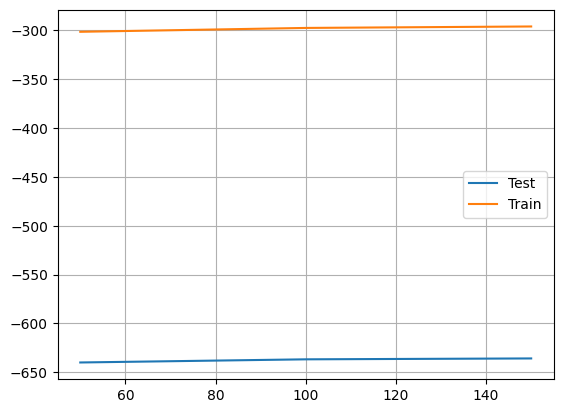

In [67]:
n_estimators = np.arange(50, 151, 50).reshape(3)
max_features = np.arange(2, 14, 2).reshape(6)
max_depth = np.arange(5, 21, 5).reshape(4)

test_score = list((rf_result[(rf_result['param_max_depth'] == 15) & (rf_result['param_max_features'] == 10)]).mean_test_score)
train_score = list((rf_result[(rf_result['param_max_depth'] == 15) & (rf_result['param_max_features'] == 10)]).mean_train_score)
plt.plot(n_estimators, test_score, label = 'Test')
plt.plot(n_estimators, train_score, label = 'Train')

plt.legend()
plt.grid()

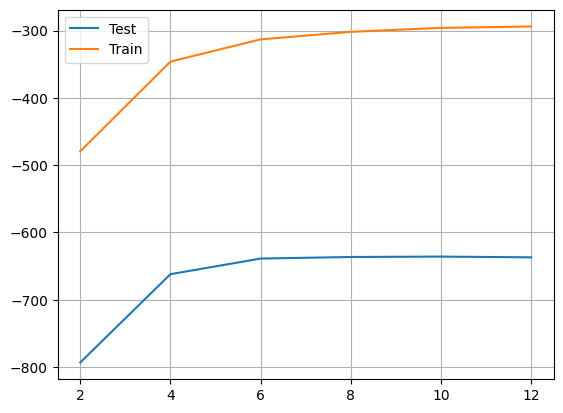

In [68]:
test_score = list((rf_result[(rf_result['param_max_depth'] == 15) & (rf_result['param_n_estimators'] == 150)]).mean_test_score)
train_score = list((rf_result[(rf_result['param_max_depth'] == 15) & (rf_result['param_n_estimators'] == 150)]).mean_train_score)
plt.plot(max_features, test_score, label = 'Test')
plt.plot(max_features, train_score, label = 'Train')
plt.legend()
plt.grid()


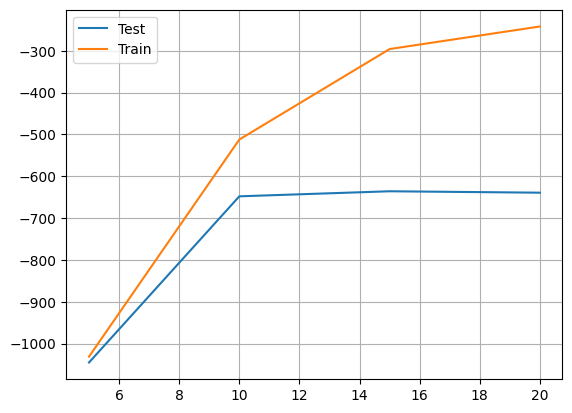

In [69]:
test_score = list((rf_result[(rf_result['param_max_features'] == 10) & (rf_result['param_n_estimators'] == 150)]).mean_test_score)
train_score = list((rf_result[(rf_result['param_max_features'] == 10) & (rf_result['param_n_estimators'] == 150)]).mean_train_score)
plt.plot(max_depth, test_score, label = 'Test')
plt.plot(max_depth, train_score, label = 'Train')
plt.legend()
plt.grid()

**Question 7.2**

How do random forests create a highly non-linear decision boundary despite the fact that all we do at each layer is apply a threshold on a feature?

- By combining multiple decision trees with different thresholds on different features and aggregating their predictions.


**Question 7.3**

Randomly pick a tree in your random forest model (with maximum depth of 4) and
 plot its structure. Which feature is selected for branching at the root node? What can you infer about the importance of this feature as opposed to others? Do the
 important features correspond to what you got in part 3.3.1?

- Length is the feature selected for branching at the root node.
- This means that length may be more important for predicting price than the other features.
- This aligns with the conclusions from 3.3.1

In [70]:
rf_rand = RandomForestRegressor(n_estimators=80, max_features=1, max_depth=4, random_state=42, oob_score=True)
rf_rand.fit(Xtrain_s, y_train)

RandomForestRegressor(max_depth=4, max_features=1, n_estimators=80,
                      oob_score=True, random_state=42)

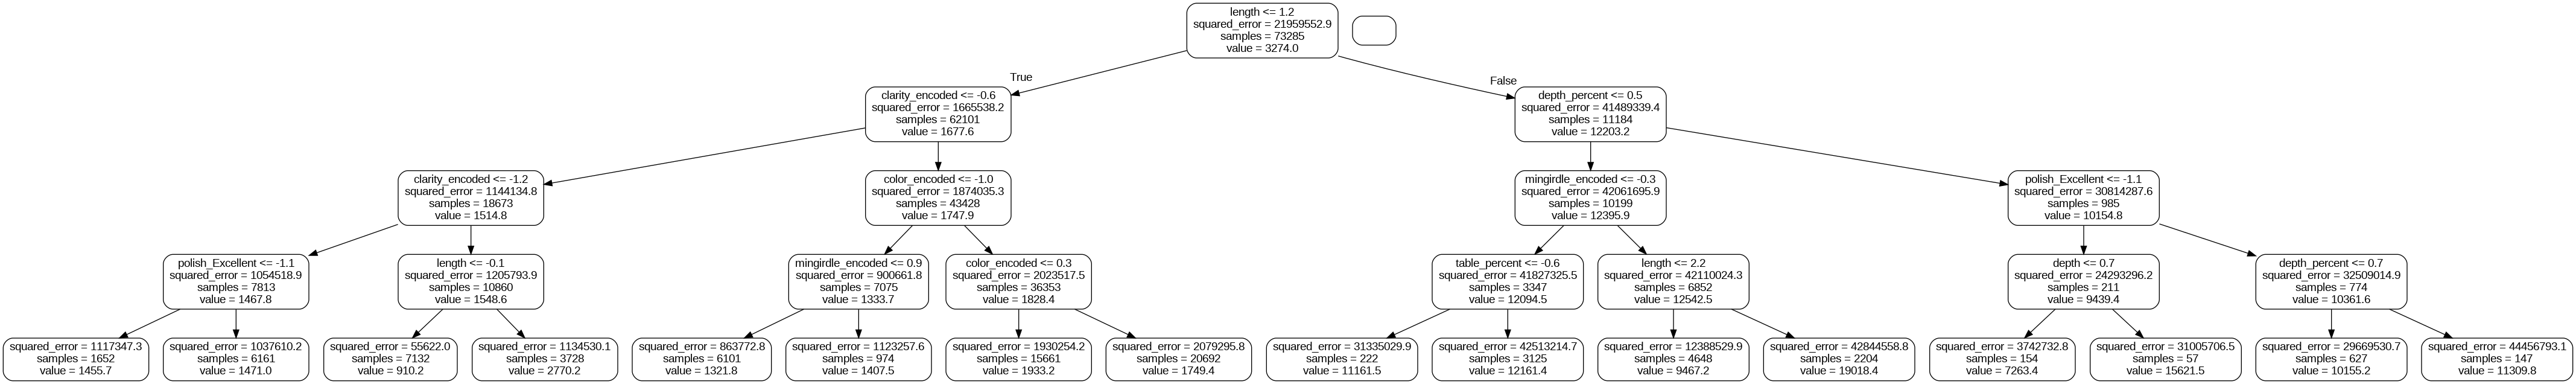

In [71]:
tree = rf_rand.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = diamonds.columns[0:13], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## 3.3.5 LightGBM, CatBoost and Bayesian Optimization

**Question 8.1**

Read the documentation of LightGBM OR CatBoost and determine the important
hyperparameters along with a search space for the tuning of these parameters (keep the search space small).
 - determined learning rate, depth, and l2 regularization coefficient(l2_leaf_reg) as important hyperparameters
 - search space indicated in params
 - polynomial features discarded due to long running time

In [28]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.4 MB/s eta 0:00:00


In [29]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00


In [30]:
from catboost import CatBoostRegressor, cv, Pool

In [145]:
cb_model = CatBoostRegressor(random_seed=42, learning_rate=0.1, depth=2, l2_leaf_reg=10, verbose=False)
cb_model.fit(Xtrain_s, y_train)
cb_preds = cb_model.predict(Xtest_s)

#cb_model.fit(X_poly, y_train)
#X_t_poly = pr.fit_transform(Xtest_s)
#cb_preds = cb_model.predict(X_t_poly)

In [146]:
np.sqrt(mean_squared_error(cb_preds, y_test))

730.274732184759

In [147]:
feature_importances = cb_model.get_feature_importance
feature_names = diamonds.columns

In [148]:
cb_model.set_feature_names(Xd.columns)

print(cb_model.get_feature_importance(prettified=True))

            Feature Id  Importances
0                carat    32.727191
1               length    24.815221
2                width    22.984052
3        color_encoded     9.618398
4                depth     6.171057
5      clarity_encoded     3.398237
6    maxgirdle_encoded     0.109600
7        table_percent     0.087339
8   symmetry_Excellent     0.025369
9        depth_percent     0.024409
10    polish_Excellent     0.015469
11       cut_Excellent     0.013866
12   mingirdle_encoded     0.009792


In [ ]:
cb_model = CatBoostRegressor(random_seed=42, learning_rate=0.1, depth=2)
cb_model.fit(X_poly, y_train)
X_t_poly = pr.fit_transform(Xtest_s)
cb_preds = cb_model.predict(X_t_poly)
np.sqrt(mean_squared_error(cb_preds, y_test))

In [80]:
A = pr.get_feature_names_out(input_features=Xd.columns)

cb_model.set_feature_names(A)

print(cb_model.get_feature_importance(prettified=True))

                                            Feature Id  Importances
0                                        carat width^2     6.917199
1                                       length^2 width     6.714558
2                                                width     6.578526
3                                             length^3     5.609705
4                                    carat width depth     5.601405
..                                                 ...          ...
555  color_encoded mingirdle_encoded maxgirdle_encoded     0.000000
556                clarity_encoded maxgirdle_encoded^2     0.000000
557                                mingirdle_encoded^3     0.000000
558              mingirdle_encoded maxgirdle_encoded^2     0.000000
559                                maxgirdle_encoded^3     0.000000

[560 rows x 2 columns]


In [42]:
params = {

        #'n_estimators':   Integer(1, 500, 50), # No of boosted trees or iterations to fit (default: 100).

        'depth': Integer(1, 16),

        'learning_rate': Real(0.01, 1.0, 'log-uniform'), # Prob of interval 1 to 10 is same as 10 to 100
                                                         # Equal prob of selection from 0.01 to 0.1, 0.1
                                                         # to 1
                                                         # In a loguniform distributon, log-transformed
                                                         # random variable is uniformly distributed

        'l2_leaf_reg': (1, 100, 10) # L2 regularization

           }

**Question 8.2**

Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to find the ideal hyperparameter combination in your search space. Keep your search space small enough to finish running on a single Google Colab instance within 60 minutes. Report the best hyperparameter set found and the corresponding RMSE.


In [39]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.0 MB/s eta 0:00:00


In [40]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
reg = CatBoostRegressor(verbose = 2)

In [43]:
opt = BayesSearchCV(estimator=reg,
                    search_spaces=params,
                    n_iter = 10,
                    scoring='neg_root_mean_squared_error',
                    cv=KFold(n_splits=10),
                    n_points=3,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=-1,                                        # number of jobs
                    return_train_score=True,
                    refit=False,
                    random_state=42)                                   # random state for replicability

In [45]:
res = opt.fit(Xtrain_s, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [46]:
print("Best set of params")
print(opt.best_params_)
print('Best RMSE:', -1*opt.best_score_)

Best set of params
OrderedDict([('depth', 7), ('l2_leaf_reg', 1), ('learning_rate', 0.08078499224286771)])
Best RMSE: 573.7923417596137


In [98]:
best_params = opt.best_params_
cbr = CatBoostRegressor(verbose = False, **best_params)

In [99]:
cbr.fit(Xtrain_s, y_train)
cbr_preds = cbr.predict(Xtest_s)

In [100]:
np.sqrt(mean_squared_error(cbr_preds, y_test))

575.0998460386147

**Question 8.3**

Qualitatively interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with regularization (shrinks the generalization gap)? Which affects the fitting efficiency?

 - The 'depth' parameter chooses the depth of each trees. Increasing the depth can improve the training accuracy but when too deep, it might also cause overfitting, which increases the generalization gap. It also increases training time, which reduces fitting efficiency. Therefore appropriate depth helps with performance, regularization, and affects the fitting efficiency.
  - For the given model, we can see that depth higher than 6 generally increases the performance, but increasing the depth even more doesn't assure the best performance. Generalization gap also tends to increase as depth gets higher(we can see overfitting by the high peak of training score with low test score), and fitting time increases dramatically.

 - The 'learning rate' parameter chooses the learning rate when calculating the gradient descent. Smaller learning rate can improve the training accuracy but it can increase training time, and also has a risk of being captured at the local minima. Larger learning rate shortens the training time and lowers the risk of getting stuck in local minima, but it might not converge well when the rate is too large. Therefore appropriate learning rate helps with performance and increases fitting efficiency.
  - For the given model, we can see lower learning rate generally increases the performance, but the lowest learning rate doesn't make the best performance. As the test score tends to follow the graph of train score, we cannot observe obvious overfitting. However, fitting time does tend to increase as learning rate gets lower.

 - The 'l2_leaf_reg' parameter chooses the coefficient at the L2 regularization term of the cost function. Appropriate regularization scheme helps with performance, shrinks generalization gap, and affects the fitting efficiency.
  - For the given model, we can see lower coefficient gives better performance, but increases the possibility of experiencing overfitting. Also, fitting time tends to be longer for smaller parameter, but as most of the L2 leaf samples have the same value(which is 10), it is more convincing to interpret it as the affect of depth and learning rate.

In [117]:
cb_result = pd.DataFrame(opt.cv_results_)[['mean_test_score','mean_train_score','param_depth','param_learning_rate','param_l2_leaf_reg', 'mean_fit_time']]

In [118]:
cb_result

,mean_test_score,mean_train_score,param_depth,param_learning_rate,param_l2_leaf_reg,mean_fit_time
0,-624.362774,-308.373004,7,0.734068,10,49.989856
1,-580.297130,-517.589540,6,0.067334,10,42.712631
2,-585.995800,-542.442065,6,0.040637,10,42.347796
3,-583.362928,-426.204033,14,0.040441,10,1030.451720
4,-590.757588,-512.859392,15,0.013324,10,2201.422493
5,-626.933979,-601.987953,3,0.186835,100,30.302144
6,-596.022915,-564.891001,8,0.016208,10,58.507083
7,-573.792342,-444.954559,7,0.080785,1,52.376195
8,-607.620974,-571.117551,3,0.130221,10,28.974887
9,-601.271807,-178.141067,13,0.15707,1,428.191371


In [119]:
cb_train = cb_result.sort_values('mean_train_score', ascending=True).reset_index(drop=True)
cb_test = cb_result.sort_values('mean_test_score', ascending=True).reset_index(drop=True)

Text(0.5, 1.0, 'Fit Time')

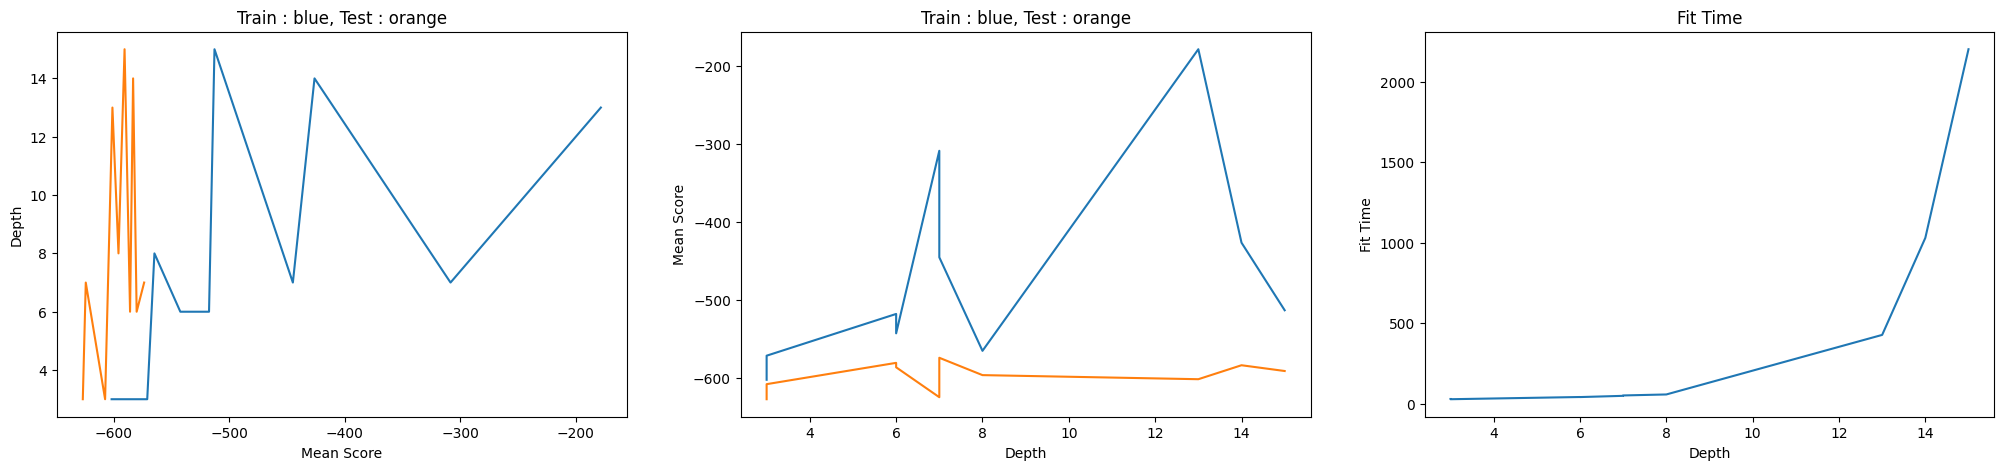

In [128]:
cb_d = cb_result.sort_values('param_depth', ascending=True).reset_index(drop=True)
fig, axs = plt.subplots(1,3,figsize=(25,5))

plt.subplot(1, 3, 1)
plt.plot(cb_train['mean_train_score'], cb_train['param_depth'], label = 'Train')
plt.plot(cb_test['mean_test_score'], cb_test['param_depth'], label = 'Test')
plt.xlabel("Mean Score")
plt.ylabel("Depth")
plt.title("Train : blue, Test : orange")

plt.subplot(1, 3, 2)
plt.plot(cb_d['param_depth'], cb_d['mean_train_score'], label = 'Train')
plt.plot(cb_d['param_depth'], cb_d['mean_test_score'], label = 'Test')
plt.xlabel("Depth")
plt.ylabel("Mean Score")
plt.title("Train : blue, Test : orange")

plt.subplot(1, 3, 3)
plt.plot(cb_d['param_depth'], cb_d['mean_fit_time'], label = 'Train')
plt.xlabel("Depth")
plt.ylabel("Fit Time")
plt.title("Fit Time")

Text(0.5, 1.0, 'Fit Time')

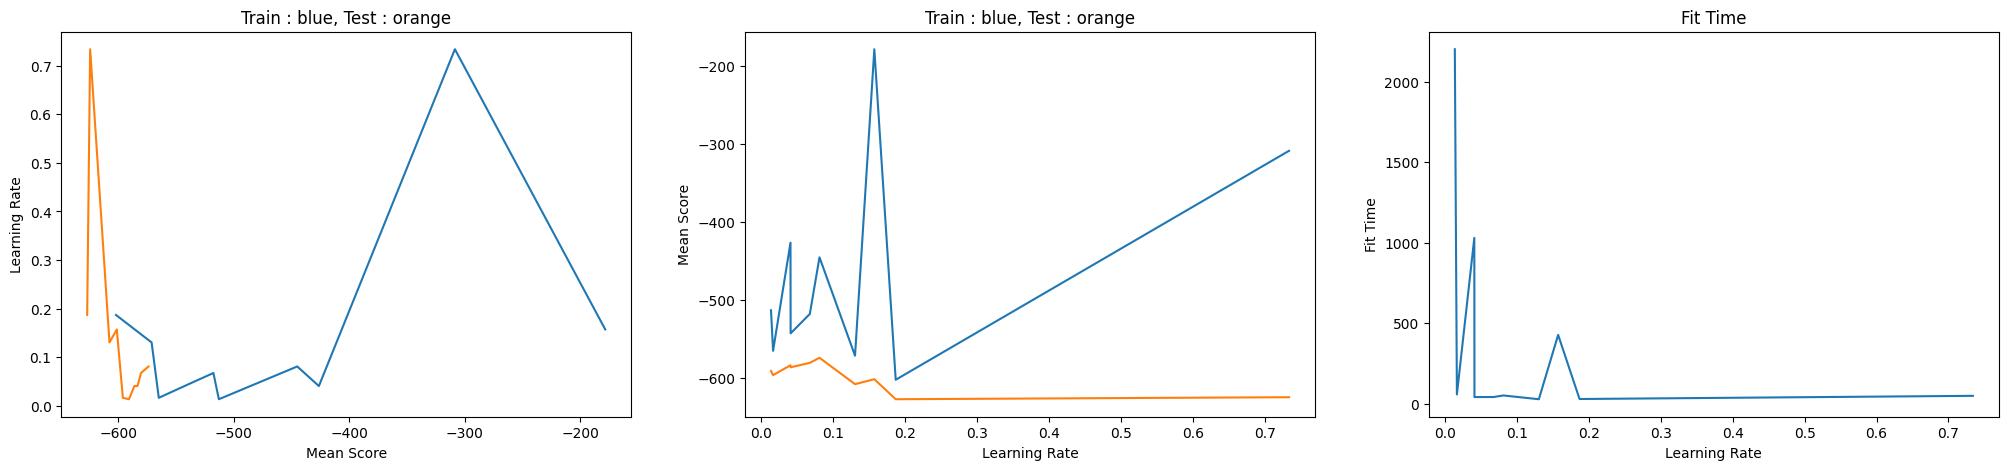

In [129]:
cb_lr = cb_result.sort_values('param_learning_rate', ascending=True).reset_index(drop=True)
fig, axs = plt.subplots(1,3,figsize=(25,5))

plt.subplot(1, 3, 1)
plt.plot(cb_train['mean_train_score'], cb_train['param_learning_rate'], label = 'Train')
plt.plot(cb_test['mean_test_score'], cb_test['param_learning_rate'], label = 'Test')
plt.xlabel("Mean Score")
plt.ylabel("Learning Rate")
plt.title("Train : blue, Test : orange")

plt.subplot(1, 3, 2)
plt.plot(cb_lr['param_learning_rate'], cb_lr['mean_train_score'], label = 'Train')
plt.plot(cb_lr['param_learning_rate'], cb_lr['mean_test_score'], label = 'Test')
plt.xlabel("Learning Rate")
plt.ylabel("Mean Score")
plt.title("Train : blue, Test : orange")

plt.subplot(1, 3, 3)
plt.plot(cb_lr['param_learning_rate'], cb_lr['mean_fit_time'], label = 'Train')
plt.xlabel("Learning Rate")
plt.ylabel("Fit Time")
plt.title("Fit Time")

Text(0.5, 1.0, 'Fit Time')

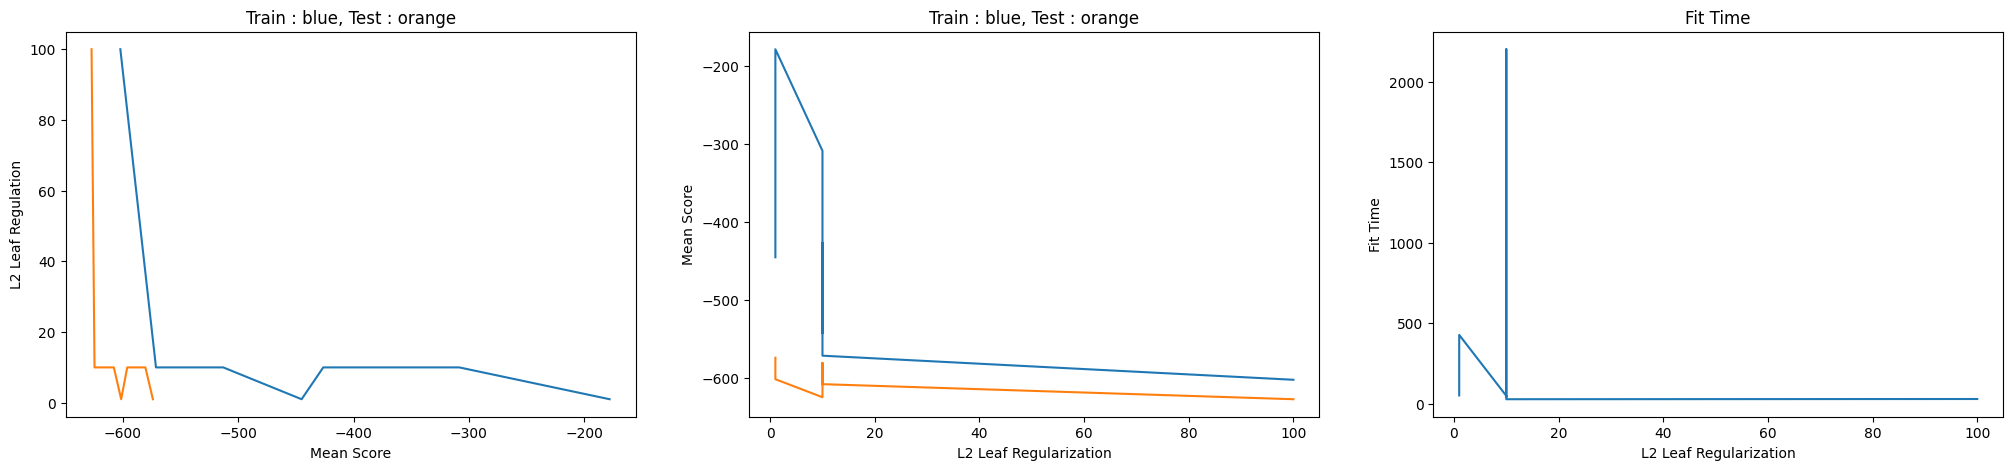

In [130]:
cb_l2 = cb_result.sort_values('param_l2_leaf_reg', ascending=True).reset_index(drop=True)
fig, axs = plt.subplots(1,3,figsize=(25,5))

plt.subplot(1, 3, 1)
plt.plot(cb_train['mean_train_score'], cb_train['param_l2_leaf_reg'], label = 'Train')
plt.plot(cb_test['mean_test_score'], cb_test['param_l2_leaf_reg'], label = 'Test')
plt.xlabel("Mean Score")
plt.ylabel("L2 Leaf Regulation")
plt.title("Train : blue, Test : orange")

plt.subplot(1, 3, 2)
plt.plot(cb_l2['param_l2_leaf_reg'], cb_l2['mean_train_score'], label = 'Train')
plt.plot(cb_l2['param_l2_leaf_reg'], cb_l2['mean_test_score'], label = 'Test')
plt.xlabel("L2 Leaf Regularization")
plt.ylabel("Mean Score")
plt.title("Train : blue, Test : orange")

plt.subplot(1, 3, 3)
plt.plot(cb_l2['param_l2_leaf_reg'], cb_l2['mean_fit_time'], label = 'Train')
plt.xlabel("L2 Leaf Regularization")
plt.ylabel("Fit Time")
plt.title("Fit Time")